In [1]:
import numpy as np
import matplotlib.pyplot as plt

from poles_roots.global_zero_pole import find_zeros_poles
from poles_roots.plotting import phase_plot, plot_poles_zeros

In [3]:
def compute_true_poles(n_max, d=1, sign=-1):
    n = np.arange(n_max)
    return sign*np.emath.sqrt(1 - (2*n + 1)**2*np.pi**2/(4*d**2))

def f(z, d, y):
    return np.sin(np.emath.sqrt(1-z**2)*(np.abs(y)-d))/(2*np.emath.sqrt(1-z**2)*np.cos(np.emath.sqrt(1-z**2)*d))

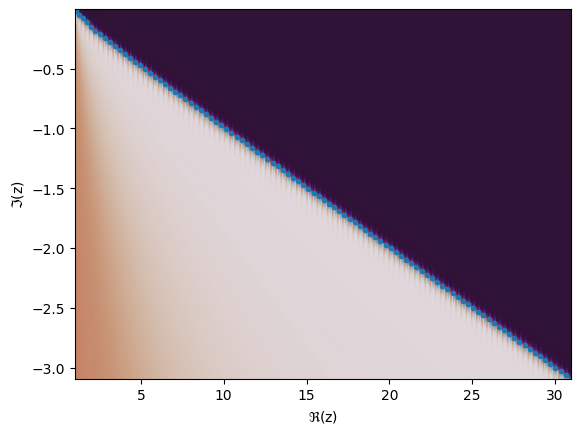

In [5]:
d = 1-10j
n = 100

poles_p = compute_true_poles(n, d=d, sign=1)

fig, ax = plt.subplots()

phase_plot(lambda z: f(z, d, 0), ax, domain=[poles_p.real.min(), poles_p.real.max(), poles_p.imag.min(), poles_p.imag.max()])
ax.plot(poles_p.real, poles_p.imag, '.')
plt.show()

In [7]:
def f(z, d):
    return (1/2)/(np.sqrt(1 - z**2)*np.cos(d*np.sqrt(1 - z**2)))

def f_prime(z, d):
    return -1/2*z*(d*np.sqrt(1 - z**2)*np.sin(d*np.sqrt(1 - z**2)) - np.cos(d*np.sqrt(1 - z**2)))/((1 - z**2)**(3/2)*np.cos(d*np.sqrt(1 - z**2))**2)

(0.7, 158.0)

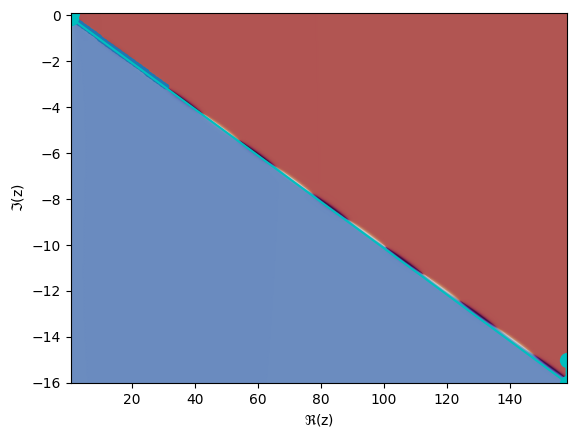

In [8]:
fig, ax = plt.subplots()
points = np.asarray([1+0.1j, 0.7-0.1j, 158-16j, 158-15j])

phase_plot(lambda z: f_prime(z, d)/f(z, d), ax, domain=[points.real.min(), points.real.max(), points.imag.min(), points.imag.max()])
ax.plot(poles_p.real, poles_p.imag, '.')


ax.plot(points.real, points.imag, '-c.', markersize=20)
ax.set_ylim(ax.yaxis.get_data_interval())
ax.set_xlim(ax.xaxis.get_data_interval())

In [9]:
res = find_zeros_poles(lambda z: f(z, d), lambda z: f_prime(z, d), points, 50, arg_principal_threshold=40, cross_ref=False)

KeyboardInterrupt: 

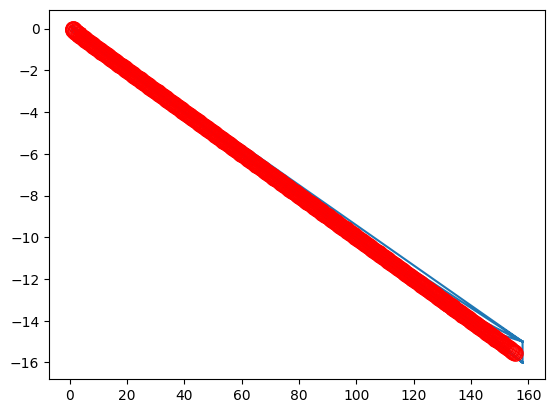

In [12]:
fig, ax = plt.subplots()
plot_poles_zeros(res, ax, expected_poles=poles_p)
ax.triplot(res.points[:, 0], res.points[:, 1], res.simplices)

(array([  1.,   4.,   4.,   2.,   0.,   0.,   0.,   0.,  42., 447.]),
 array([-10.31467582,  -9.10211463,  -7.88955343,  -6.67699224,
         -5.46443105,  -4.25186986,  -3.03930866,  -1.82674747,
         -0.61418628,   0.59837491,   1.8109361 ]),
 <BarContainer object of 10 artists>)

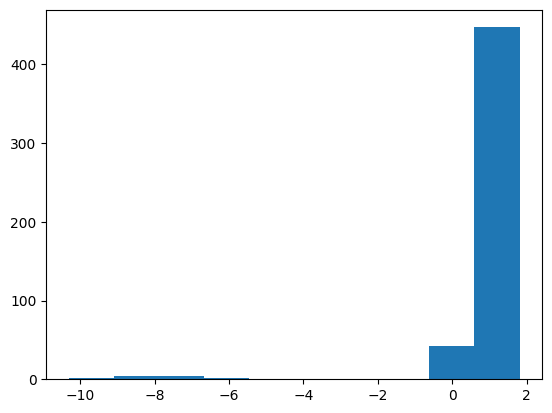

In [13]:
errors = np.min(np.abs(np.subtract.outer(poles_p, res.poles)), axis=1)
fig, ax = plt.subplots()
ax.hist(np.log10(errors))

In [7]:
res.residues

array([-1. -2.61349952e-13j, -1. +4.62298118e-14j, -1. -1.04466571e-14j,
       -1. +2.88387930e-14j, -1. +3.24676708e-14j, -0.5+6.75281963e-12j,
       -1. -6.91007858e-12j, -1. -1.95409761e-13j, -1. -1.96211239e-13j,
       -1. -1.48930171e-13j, -1. -1.30761752e-13j])